## Customer Churn Prediction

In [4]:
# conda install -c districtdatalabs yellowbrick

In [5]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from sklearn.metrics import accuracy_score,f1_score, recall_score, classification_report,confusion_matrix,precision_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Building Models

In [6]:
df = pd.read_csv("telco_clean_20201215.csv")
df.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,5.463515,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,43.468379,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,10.399519,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,42.903963,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,12.314625,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [7]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [8]:
print("Percentage of Churned Customer:%",
      round(df.Churn.mean(),2))

Percentage of Churned Customer:% 0.27


> **Target variable is a bit of imbalanced. We should resample the data.**

## Splitting Data

In [9]:
X=df.drop('Churn',axis=1)
y=df.Churn

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42) # stratify=y

In [11]:
y_train.value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

### SMOTE

In [12]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_sample(X_train, y_train)
y_smote.value_counts()

0    4138
1    4138
Name: Churn, dtype: int64

### ADASYN

In [13]:
ad = ADASYN(random_state=42)
X_adasyn, y_adasyn = ad.fit_sample(X_train, y_train)
y_adasyn.value_counts()

1    4187
0    4138
Name: Churn, dtype: int64

In [14]:
# SMOTE
X_train, y_train = X_smote, y_smote

# ADASYN
# X_train, y_train = X_adasyn, y_adasyn

In [18]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit (X_train, X_test, y_train, y_test)
models

 93%|█████████▎| 28/30 [00:19<00:01,  1.92it/s]

[16:39:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 30/30 [00:19<00:00,  1.50it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.77,0.77,0.77,0.78,0.48
LinearDiscriminantAnalysis,0.78,0.77,0.77,0.79,0.11
RidgeClassifierCV,0.78,0.77,0.77,0.79,0.06
RidgeClassifier,0.78,0.77,0.77,0.79,0.05
BernoulliNB,0.74,0.77,0.77,0.75,0.08
NearestCentroid,0.73,0.77,0.77,0.74,0.03
NuSVC,0.78,0.76,0.76,0.79,2.48
LinearSVC,0.79,0.76,0.76,0.80,0.77
GaussianNB,0.72,0.76,0.76,0.74,0.04


# ``1.XGBoost Classifer``

In [19]:
xgb= XGBClassifier()
xgb.fit(X_train , y_train)

[16:40:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
y_pred = xgb.predict(X_test)

### **Evaluate the performance**

In [21]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[872 164]
[139 234]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.59      0.63      0.61       373

    accuracy                           0.78      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.78      0.79      1409



In [22]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.7849538679914834 
xgb_f1_score: 0.7871271701036096 
xgb_recall: 0.7849538679914834


### **Tunning XGBOOST**

In [23]:
xgb = XGBClassifier()

In [24]:
xgb_params = {"n_estimators": [50,500,1000],
             "subsample":[0.1,0.5,1],
             "max_depth":[3,7,9],
             "learning_rate":[0.1,0.01,0.3]}

In [25]:
# xgb_grid= GridSearchCV(xgb, xgb_params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [26]:
# xgb_grid= RandomizedSearchCV(xgb, xgb_params, cv = 5,
#                              n_iter=10,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train, y_train)

In [27]:
# xgb_grid.best_params_

In [28]:
xgb_tuned = XGBClassifier(learning_rate= 0.01, 
                                max_depth= 3, 
                                n_estimators= 520, 
                                subsample= 0.15).fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)

[16:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[803 233]
[ 79 294]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1036
           1       0.56      0.79      0.65       373

    accuracy                           0.78      1409
   macro avg       0.73      0.78      0.75      1409
weighted avg       0.82      0.78      0.79      1409



In [30]:
xgb_f1_true=float(classification_report(y_test, y_pred).split()[12])
xgb_f1_true

0.65

In [31]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.7785663591199432 
xgb_f1_score: 0.788621565569963 
xgb_recall: 0.7785663591199432


**`Cross Validation Scores`**

In [32]:
# xgb_accuracy = cross_val_score(xgb_tuned, X_test, y_test,cv = 10).mean()
# xgb_f1_score = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
# xgb_recall = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
# print('rfc_accuracy:',rfc_accuracy,
#       '\nrfc_f1_score:',rfc_f1_score,
#       '\nrfc_recall:',rfc_recall)

### Visualization of Confusion Matrix with Table

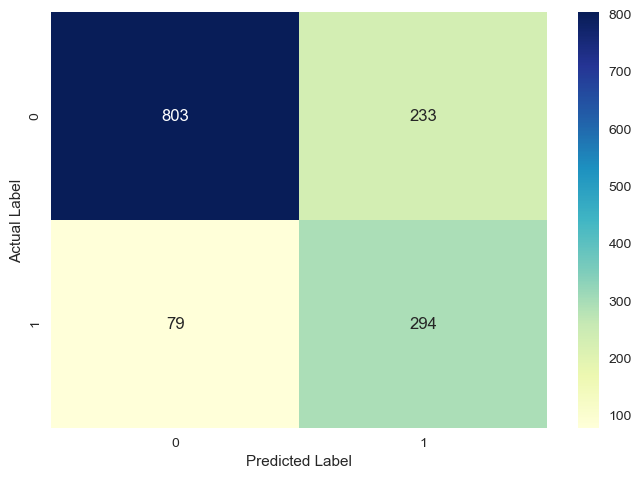

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

# ``2.Random Forest Classifier``

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = rf_model.predict(X_test)

### **Evaluate the performance**

In [36]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[872 164]
[154 219]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1036
           1       0.57      0.59      0.58       373

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.77      0.78      1409



In [37]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.7743080198722498 
rfc_f1_score: 0.7752534269552136 
rfc_recall: 0.7743080198722498


**`Cross Validation Scores`**

In [38]:
# rfc_accuracy = cross_val_score(rf_model, X_test, y_test,cv = 10).mean()
# rfc_f1_score = cross_val_score(rf_model, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
# rfc_recall = cross_val_score(rf_model, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
# print('rfc_accuracy:',rfc_accuracy,
#       '\nrfc_f1_score:',rfc_f1_score,
#       '\nrfc_recall:',rfc_recall)

### **RF Tunning**

In [39]:
rfc_params = {"n_estimators":[300,500,1000],
              "max_depth":[7,10,15],
              "max_features": [8,10,15],
              "min_samples_split": [4,6,8]}

In [40]:
# rfc_grid = GridSearchCV(rf_model, rfc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [41]:
# rfc_grid= RandomizedSearchCV(rf_model, xgb_params, cv = 5,
#                              n_iter=10,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train_tf_idf, y_train)

In [42]:
# rfc_grid.best_params_

In [43]:
rfc_tuned = RandomForestClassifier(max_depth = 10,             
                                  max_features = 10, 
                                  min_samples_split = 4, 
                                  n_estimators = 500).fit(X_train, y_train)

In [44]:
y_pred = rfc_tuned.predict(X_test)
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[830 206]
[ 98 275]
              precision    recall  f1-score   support

           0       0.89      0.80      0.85      1036
           1       0.57      0.74      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409



In [45]:
rf_f1_true=float(classification_report(y_test, y_pred).split()[12])
rf_f1_true

0.64

### **Visualization of Confusion Matrix with Table**

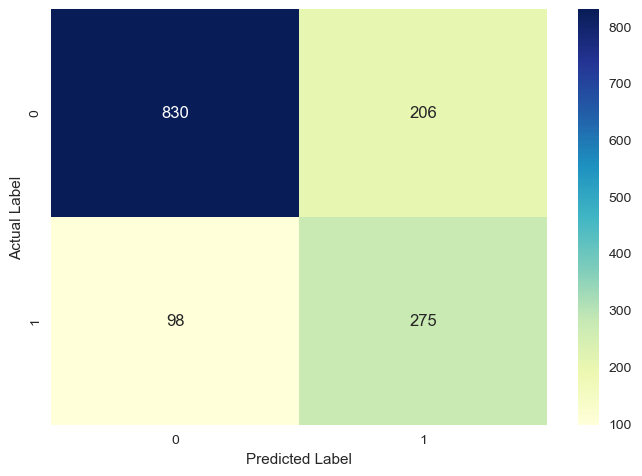

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

# ``3.KNeighborsClassifer``

### Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
y_pred = knn.predict(X_test)

### **Visualize Accuracies of Train & Test Data by Different k`s**

In [51]:
neighbors = range(1,18,2) # k nin tek sayi olmasi beklenir.
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

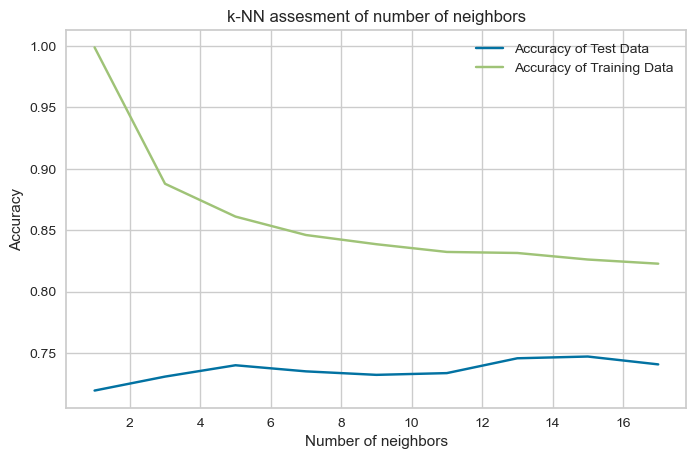

In [52]:
plt.figure(figsize=(8,5))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### **Find Optimum K Value with Elbow Method**

In [56]:
error_rate = []
# Her bir error rate icin olusan k degeri bu listeye atilacak
# k nin tek sayi olmasi beklenir.
# Will take some time
for i in range(1,18,2):
    
    model = KNeighborsClassifier(n_neighbors=i) # k= i
    model.fit(X_train,y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test)) 
    

# print('Optimum K_Value: ',error_rate.index(min(error_rate)))

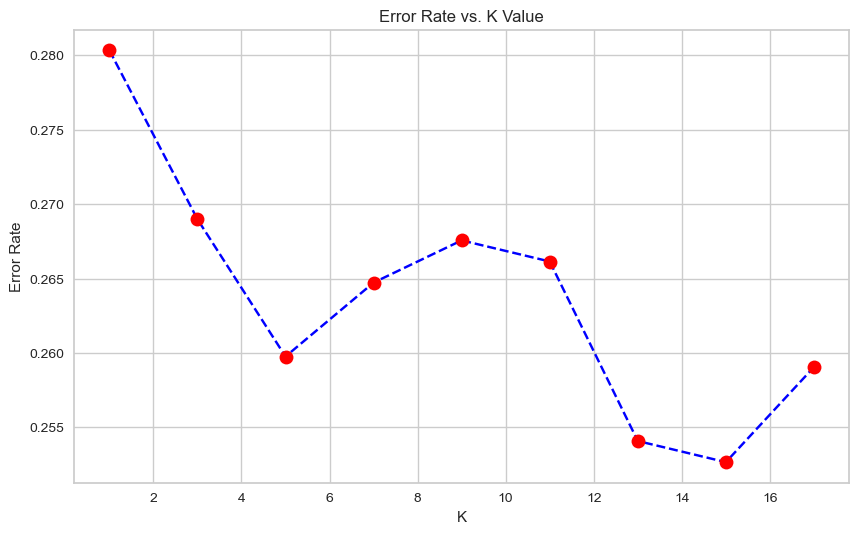

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,18,2),
         error_rate,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

### Tunning KNN with GridSearchCV

In [58]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": range(1,18,2)} # k tek sayi olmali

knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [59]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [60]:
knn_tuned= KNeighborsClassifier(n_neighbors = 33).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

### **Evaluate the Performance**

In [61]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[733 303]
[ 67 306]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.50      0.82      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409



In [62]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1_score = f1_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
print('knn_accuracy:',knn_accuracy,
      '\nknn_f1_score:',knn_f1_score,
      '\nknn_recall:',knn_recall)

knn_accuracy: 0.7374024130589071 
knn_f1_score: 0.7520797222891182 
knn_recall: 0.7374024130589071


In [63]:
knn_f1_true=float(classification_report(y_test, y_pred).split()[12])
knn_f1_true

0.62

### Visualization of Confusion Matrix with Table

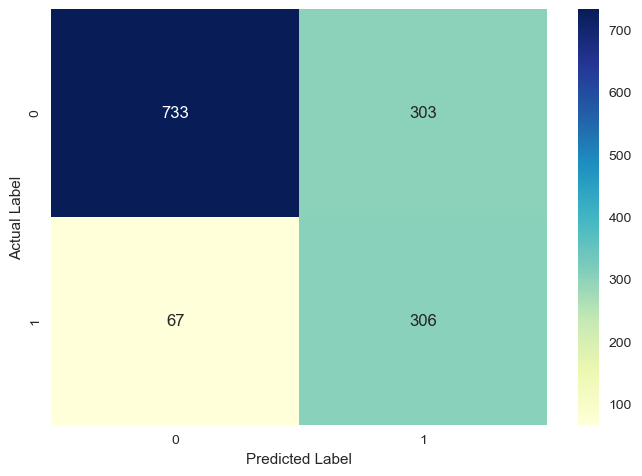

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

# `4-Logistic Regression`

In [65]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [66]:
y_pred=model.predict(X_test)

### **Evaluate the performance**

In [67]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[852 184]
[114 259]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1036
           1       0.58      0.69      0.63       373

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.79      0.79      1409



In [68]:
log_accuracy = accuracy_score(y_test, y_pred)
log_f1_score = f1_score(y_test, y_pred, average='weighted')
log_recall = recall_score(y_test, y_pred, average='weighted')
print('log_accuracy:',log_accuracy,
      '\nlog_f1_score:',log_f1_score,
      '\nlog_recall:',log_recall)

log_accuracy: 0.7885024840312278 
log_f1_score: 0.7938765596418083 
log_recall: 0.7885024840312278


In [69]:
log_f1_true=float(classification_report(y_test, y_pred).split()[12])
log_f1_true

0.63

### `Compare Models Accuracies & F1 Scores & Recall`

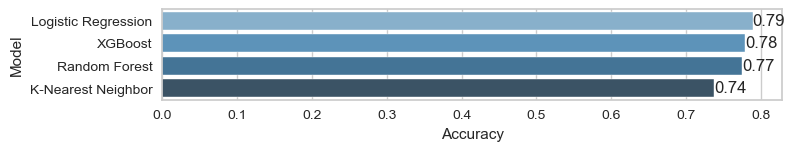

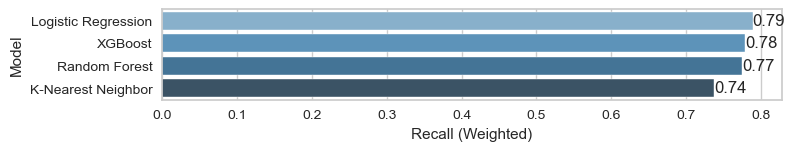

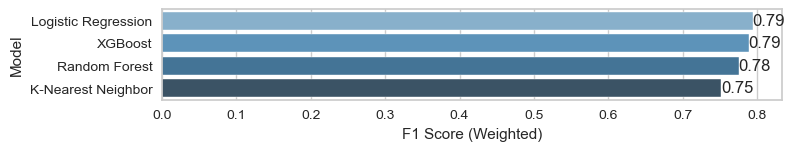

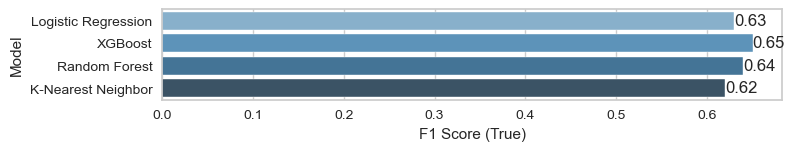

In [70]:
compare = pd.DataFrame({"Model": ["Random Forest", "XGBoost","Logistic Regression","K-Nearest Neighbor"],
                        "Accuracy": [rfc_accuracy, xgb_accuracy, log_accuracy,knn_accuracy],
                        "F1 Score": [rfc_f1_score, xgb_f1_score, log_f1_score, knn_f1_score],
                        "Recall": [rfc_recall, xgb_recall, log_recall,knn_recall],
                        "F1 Score (True)": [rf_f1_true, xgb_f1_true, log_f1_true, knn_f1_true]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    
plt.subplot(411)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('Recall (Weighted)')
plt.show()

plt.subplot(413)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('F1 Score (Weighted)')
plt.show()

plt.subplot(414)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score (True)", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

### Result
* F1 score is used in the case where we have skewed classes i.e one type of class examples more than the other type class examples.
* For Churn Analysis, `F1 score of True Class` is the most important parameter.
* As we can say, XGBoost and Random Forest Classifier with SMOTE algorithm are the best models when we looked at the `F1 score of True Class`

### Feature Importance for XGBoost

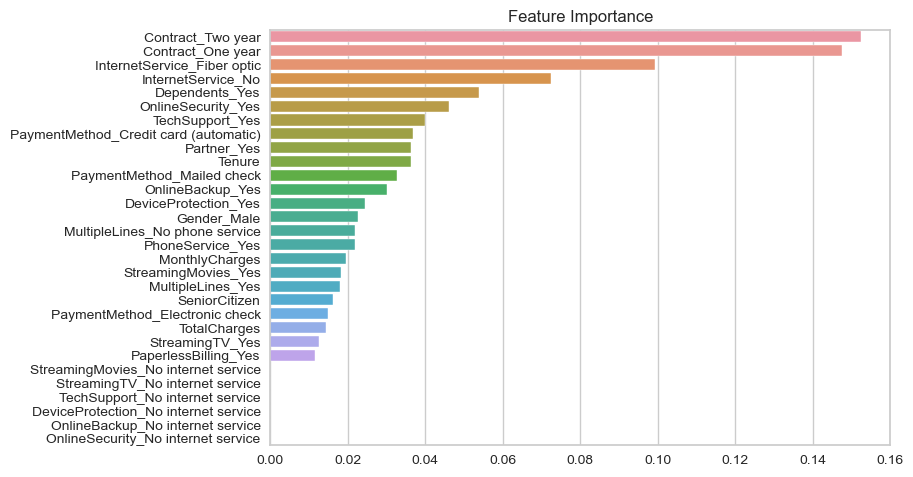

Contract_Two year                       0.15
Contract_One year                       0.15
InternetService_Fiber optic             0.10
InternetService_No                      0.07
Dependents_Yes                          0.05
OnlineSecurity_Yes                      0.05
TechSupport_Yes                         0.04
PaymentMethod_Credit card (automatic)   0.04
Partner_Yes                             0.04
Tenure                                  0.04
dtype: float32

In [71]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

feature_imp[:10]

### Feature Importance for Random Forest

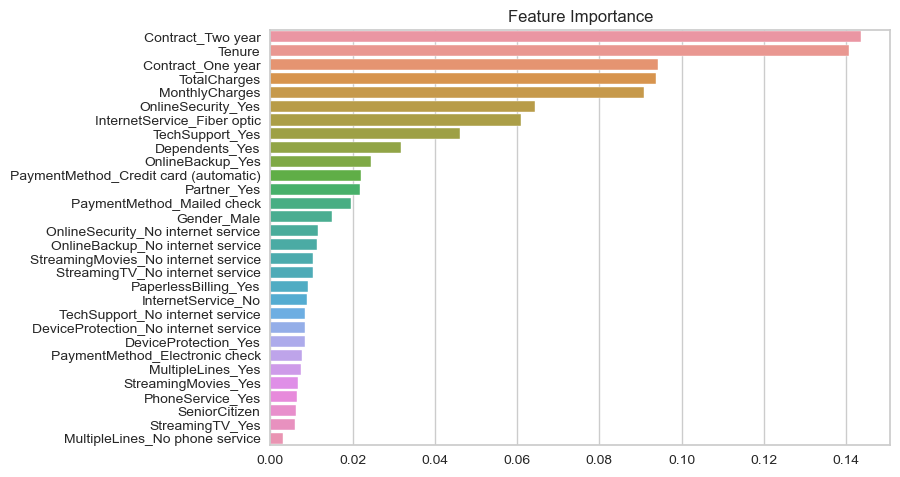

Contract_Two year             0.14
Tenure                        0.14
Contract_One year             0.09
TotalCharges                  0.09
MonthlyCharges                0.09
OnlineSecurity_Yes            0.06
InternetService_Fiber optic   0.06
TechSupport_Yes               0.05
Dependents_Yes                0.03
OnlineBackup_Yes              0.02
dtype: float64

In [72]:
feature_imp = pd.Series(rfc_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

feature_imp[:10]

   **Top 10 Feature Importance for XGBoost**
   
    Contract_Two year                        0.152446
    Contract_One year                        0.147547
    InternetService_Fiber optic              0.099390
    InternetService_No                       0.072385
    Dependents_Yes                           0.053979
    OnlineSecurity_Yes                       0.046085
    TechSupport_Yes                          0.039856
    PaymentMethod_Credit card (automatic)    0.036813
    Partner_Yes                              0.036286
    Tenure                                   0.036252

### Saving Model

In [74]:
import pickle
import pandas as pd

In [75]:
pickle.dump(xgb_tuned,open("XGBoost.pkl","wb"))
pickle.dump(rfc_tuned,open("RandomForest.pkl","wb"))

In [76]:
xgb_model = pickle.load(open("XGBoost.pkl","rb"))
rfc_model = pickle.load(open("RandomForest.pkl","rb"))
# df = pd.read_csv("telco_clean_20201215.csv")

In [77]:
new_list=["Contract", "InternetService", "Dependents", "OnlineSecurity",'TechSupport',"PaymentMethod",'Partner','Tenure']

In [78]:
my_dict = {"Contract":'Month-to-month', 
           "InternetService":'Fiber optic', 
           "Dependents":"Yes", 
           "OnlineSecurity":'Yes',
           "TechSupport":'Yes',
           'PaymentMethod':'Electronic check',
           'Partner':'Yes',
           'Tenure':60,
           'TotalCharges':2500
            }

X = pd.DataFrame.from_dict([my_dict])

X=pd.get_dummies(X)
X.columns

Index(['Tenure', 'TotalCharges', 'Contract_Month-to-month',
       'InternetService_Fiber optic', 'Dependents_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'PaymentMethod_Electronic check', 'Partner_Yes'],
      dtype='object')

In [79]:
all_columns=df.drop('Churn',axis=1).columns
all_columns

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'Gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [80]:
X = pd.get_dummies(X).reindex(columns=all_columns, fill_value=0)
X

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,60,0,2500,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
prediction_XGB = xgb_model.predict(X)
print("The Churn : ",'Yes' if prediction_XGB[0] else 'No')

The Churn :  No


In [82]:
prediction_XGB = xgb_model.predict_proba(X)
print(f'The Probability of the Customer Churn is %{round(prediction_XGB[0][1]*100,1)}')

The Probability of the Customer Churn is %19.6


In [83]:
pip freeze

altair==4.1.0
argon2-cffi @ file:///C:/ci/argon2-cffi_1596828585465/work
astor==0.8.1
async-generator==1.10
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
backcall==0.2.0
base58==2.1.0
bleach @ file:///tmp/build/80754af9/bleach_1611690509631/work
blinker==1.4
Note: you may need to restart the kernel to use updated packages.cachetools==4.2.1
certifi==2020.12.5
cffi @ file:///C:/ci/cffi_1606255208697/work
chardet==4.0.0
click==7.1.2
colorama @ file:///tmp/build/80754af9/colorama_1607707115595/work
cycler==0.10.0

decorator==4.4.2
defusedxml==0.6.0
entrypoints==0.3
gitdb==4.0.5
GitPython==3.1.12
idna==2.10
imbalanced-learn==0.7.0
imblearn==0.0
importlib-metadata @ file:///tmp/build/80754af9/importlib-metadata_1602276842396/work
iniconfig==1.1.1
ipykernel==5.4.3
ipython @ file:///C:/ci/ipython_1604083276484/work
ipython-genutils @ file:///tmp/build/80754af9/ipython_genutils_1606773439826/work
ipywidgets==7.6.3
jedi @ file:///C:/ci/jedi_1611315808330/work
Ji